In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

In [ ]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import threading
import time
import concurrent.futures
import pandas as pd
from sklearn.cluster import KMeans
from itertools import combinations
pd.options.mode.chained_assignment = None
import warnings

warnings.filterwarnings('ignore')

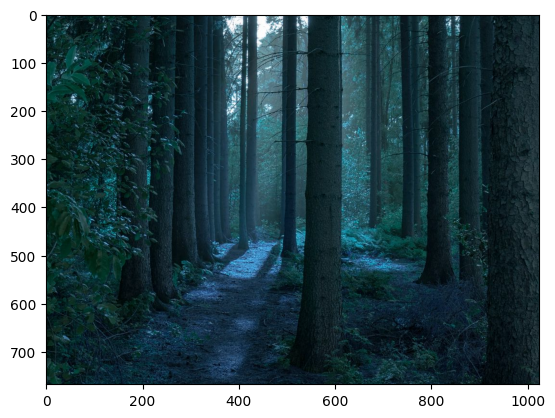

In [ ]:
image = cv2.imread('/content/drive/MyDrive/tropa_les_derevia_944568_1024x768.jpg')
plt.imshow(image)

In [ ]:
image_10240_x_7680 = cv2.imread('/content/drive/MyDrive/tropa_les_derevia_10240x7680.jpg')
image_10240_x_7680.shape

(7680, 10240, 3)

In [ ]:
image_12800_x_9600 = cv2.imread('/content/drive/MyDrive/цветок_лепестки_белый_12800_9600.jpg')
image_12800_x_9600.shape

(9600, 12800, 3)

In [ ]:
image_20480_x_15360 = cv2.imread('/content/drive/MyDrive/калифорнии_штаты_Калифорния_20480 x 15360.jpg')
image_20480_x_15360.shape

(15360, 20480, 3)

### Программа А

In [ ]:
def image_processing(picture):
  intensity = (picture[:, :, 0] + picture[:, :, 1] + picture[:, :, 2]) / 3   # вычисляем интенсивность

  #  Бинаризация изображения
  thresholdValue = 42       # пороговое значение интенсивности
  maxVal = 1                # на что заменяем, если интесивность > thresholdValue
  image_binary = cv2.threshold(intensity, thresholdValue, maxVal, cv2.THRESH_BINARY)[1].astype(np.uint8)

  #  Инициализируем ядро
  kernel = np.ones((3,3),np.uint8)

  # Дилатация изображения
  image_dilation = cv2.dilate(image_binary,kernel,iterations = 1)

  return image_dilation   # 1 канальное бинарное изображение + дилатация

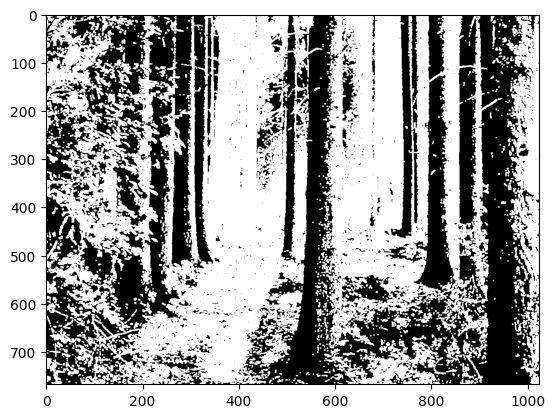

In [ ]:
image_dilation = image_processing(image)
plt.imshow(image_dilation,cmap = 'gray')

In [ ]:
def thread_func(process_func, image):
  number_of_threads = [2,4,6,8,10,12,14,16]
  # number_of_threads = [2]
  threads_execution_time = []

  for threads in number_of_threads:
    execute_time = []
    for _ in range(3):
      start_time = time.time()

      with concurrent.futures.ThreadPoolExecutor(max_workers = threads) as executor:
        future = executor.submit(process_func, image)
        dilated_image = future.result()

      execution_time = time.time() - start_time
      execute_time.append(execution_time)
    plt.imsave(f'/content/sample_data/delated_image_{threads}_threads.jpg', dilated_image, cmap='gray')
    threads_execution_time.append(np.mean(execute_time))
  return threads_execution_time

In [ ]:
number_of_threads = [2,4,6,8,10,12,14,16]

In [ ]:
threads_execution_time_image_10240_x_7680 = thread_func(image_processing,image_10240_x_7680)
threads_execution_time_image_10240_x_7680

[1.0308686097462971,
 0.9455620447794596,
 1.0960383415222168,
 0.9720892906188965,
 1.3402230739593506,
 0.9416400591532389,
 1.040657917658488,
 1.0859653949737549]

In [ ]:
threads_execution_time_image_12800_x_9600 = thread_func(image_processing,image_12800_x_9600)
threads_execution_time_image_12800_x_9600

[1.6456124782562256,
 1.3845775127410889,
 1.5432748794555664,
 1.944414536158244,
 1.7835900783538818,
 1.6458196640014648,
 1.4267717997233074,
 1.4242572784423828]

In [ ]:
threads_execution_time_image_20480_x_15360 = thread_func(image_processing,image_20480_x_15360)
threads_execution_time_image_20480_x_15360

[3.676015059153239,
 3.9099904696146646,
 4.1806102593739825,
 3.398541529973348,
 3.6508723894755044,
 3.7304581006368003,
 3.7591447035471597,
 3.932516018549601]

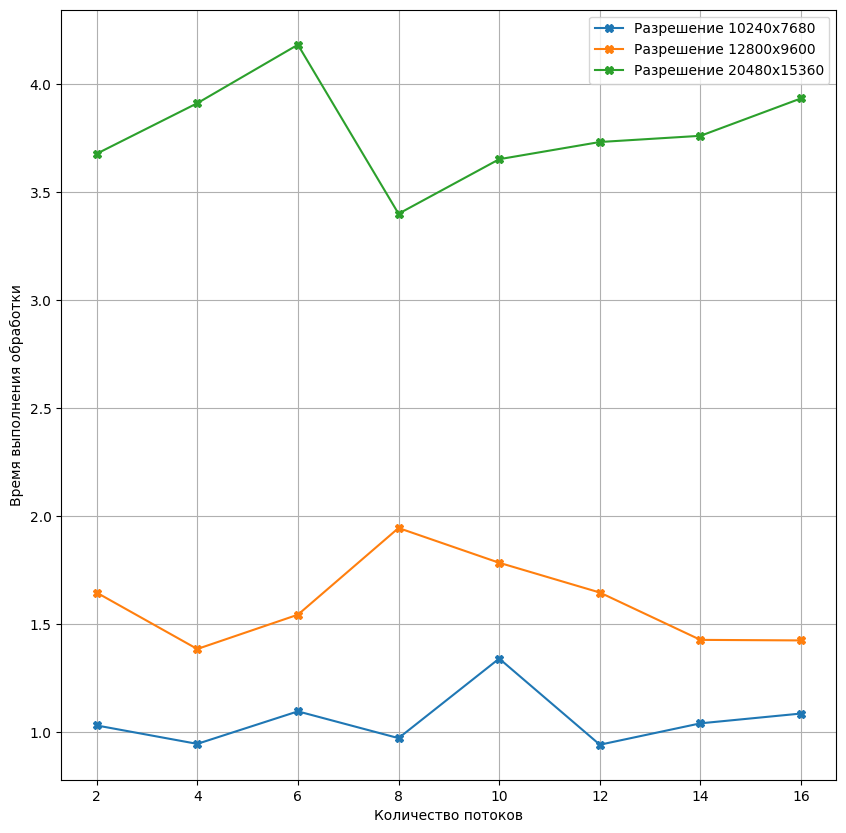

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plt.xlabel('Количество потоков')
plt.ylabel('Время выполнения обработки')
plt.grid(True)
plt.plot(number_of_threads,threads_execution_time_image_10240_x_7680, label = 'Разрешение 10240x7680', marker = 'X')
plt.plot(number_of_threads,threads_execution_time_image_12800_x_9600, label = 'Разрешение 12800x9600', marker = 'X')
plt.plot(number_of_threads,threads_execution_time_image_20480_x_15360, label = 'Разрешение 20480x15360', marker = 'X')
plt.legend()

### Программа B

In [ ]:
def conv_processing(image):
  # Инвертируем изображение
  invert_image = 255 - image

  # Ядро обнаружения границ
  kernel = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
  
  # Применяем фильтр
  result_image = cv2.filter2D(src=invert_image, ddepth=-1, kernel=kernel)
  return result_image

In [ ]:
processed_image = conv_processing(image)
# plt.imshow(result_image,cmap = 'gray')

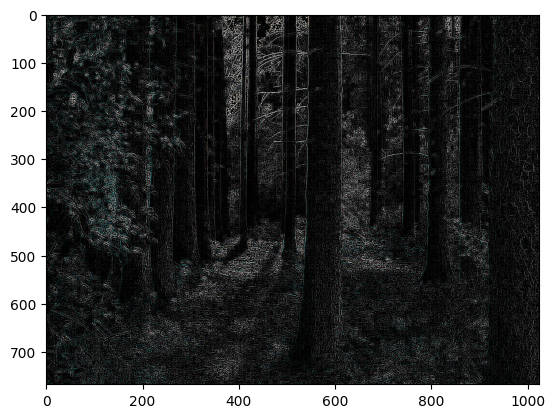

In [ ]:
plt.imshow(processed_image,cmap = 'gray')

In [ ]:
threads_execution_time_image_10240_x_7680 = thread_func(conv_processing,image_10240_x_7680)
threads_execution_time_image_10240_x_7680

[0.6111636161804199,
 0.5163971583048502,
 0.5048620700836182,
 0.511949380238851,
 0.6407891909281412,
 0.5137888590494791,
 0.5096638202667236,
 0.5261108875274658]

In [ ]:
threads_execution_time_image_12800_x_9600 = thread_func(conv_processing,image_12800_x_9600)
threads_execution_time_image_12800_x_9600

[0.8029423554738363,
 0.7802315553029379,
 0.9846235911051432,
 0.7618374029795328,
 0.9362068970998129,
 0.7846508026123047,
 0.7873782316843668,
 0.7814293702443441]

In [ ]:
threads_execution_time_image_20480_x_15360 = thread_func(conv_processing,image_20480_x_15360)
threads_execution_time_image_20480_x_15360

[2.2570766607920327,
 2.0242086251576743,
 2.266627311706543,
 2.0434377193450928,
 2.301436980565389,
 2.0407652854919434,
 2.0824809074401855,
 2.202789386113485]

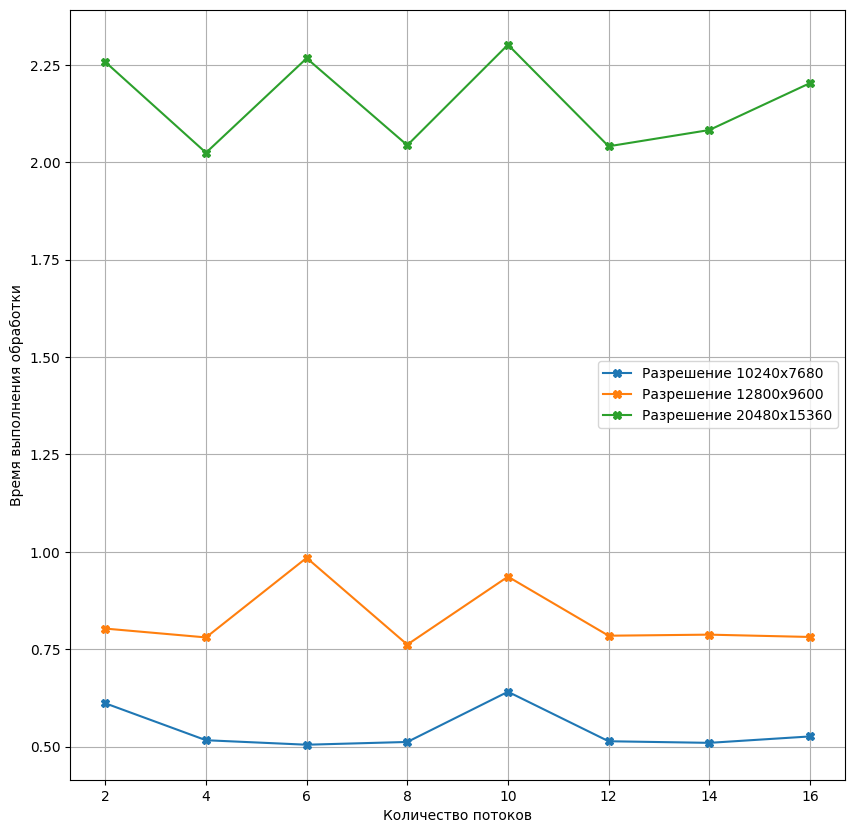

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plt.xlabel('Количество потоков')
plt.ylabel('Время выполнения обработки')
plt.grid(True)
plt.plot(number_of_threads,threads_execution_time_image_10240_x_7680, label = 'Разрешение 10240x7680', marker = 'X')
plt.plot(number_of_threads,threads_execution_time_image_12800_x_9600, label = 'Разрешение 12800x9600', marker = 'X')
plt.plot(number_of_threads,threads_execution_time_image_20480_x_15360, label = 'Разрешение 20480x15360', marker = 'X')
plt.legend()

### Программа C

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BD-Patients.csv')[['HCT_mean', 'Urine_mean']]

In [ ]:
number_of_threads = [2,4,6,8,10,12,14,16]

In [ ]:
df.head

<bound method NDFrame.head of        HCT_mean  Urine_mean
0     32.500000  171.052632
1     28.655556  151.560976
2     28.460000  124.951220
3     37.442857  545.833333
4     29.550000   62.131579
...         ...         ...
7995  29.275000  129.487805
7996  29.762500   20.333333
7997  30.766667  135.926829
7998  30.500000  324.444444
7999  27.825000   98.369565

[8000 rows x 2 columns]>

In [ ]:
df.shape

(8000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HCT_mean    7876 non-null   float64
 1   Urine_mean  7787 non-null   float64
dtypes: float64(2)
memory usage: 125.1 KB


In [ ]:
# Приводим значения в диапазон от 0 до 1
df['HCT_mean'] = df['HCT_mean'] / df['HCT_mean'].max()
df['Urine_mean'] = df['Urine_mean'] / df['Urine_mean'].max()

# Заполняем пропуски средним значением
df['HCT_mean'][df['HCT_mean'].isnull()] = df['HCT_mean'].mean()
df['Urine_mean'][df['Urine_mean'].isnull()] = df['Urine_mean'].mean()

In [ ]:
kmeans_global_center = KMeans(n_clusters=1).fit(df)
global global_center
global_center = kmeans_global_center.cluster_centers_[0][:2]

df['cluster'] = kmeans_global_center.predict(df)

In [ ]:
df_1000 = df[:1000]
df_3000 = df[:3000]
df_5000 = df[:5000]

In [ ]:
def graphic(kmeans, data):
  fig = plt.figure(figsize=(10, 10))
  plt.subplot(1, 1, 1)
  cluster_centers_coord = kmeans.cluster_centers_
  for cluster_number in range(len(cluster_centers_coord)):
    plt.scatter(data['HCT_mean'][data['cluster'] == cluster_number],data['Urine_mean'][data['cluster'] == cluster_number])
  plt.xlabel('HCT_mean')
  plt.ylabel('Urine_mean')
  return plt.scatter(cluster_centers_coord[:,0],cluster_centers_coord[:,1],marker = '.', s = 100, color = 'black')

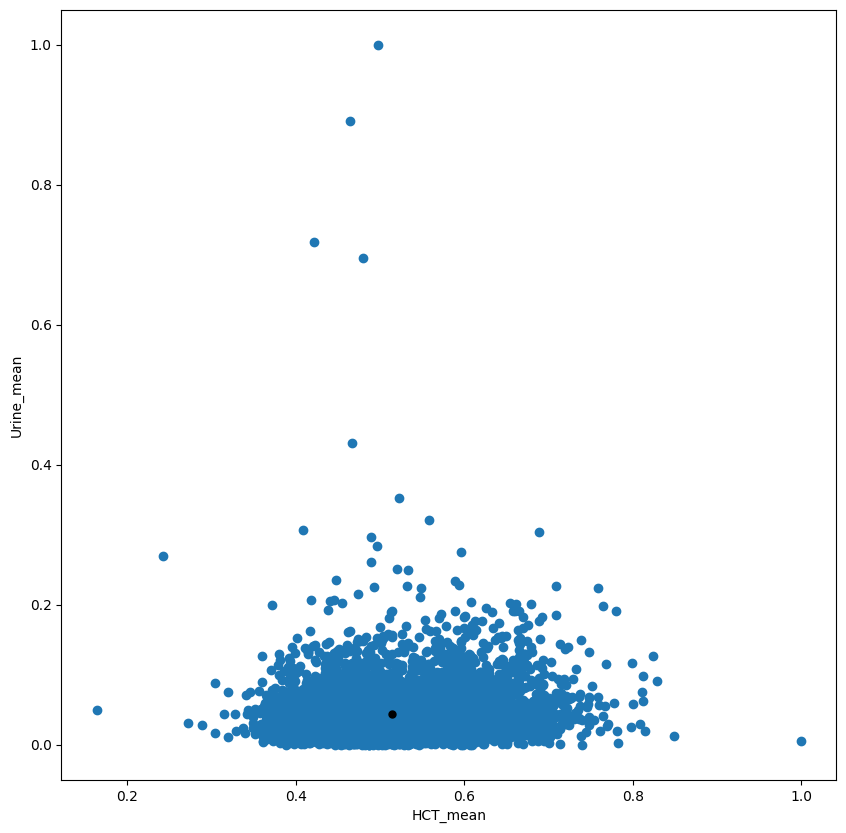

In [ ]:
graphic(kmeans_global_center,df)

In [ ]:
def MB_index_calculating(data):
  clusters_number_list = [3,4,5]
  # clusters_number_list = [3]
  MB_index_list = []

  for clusters in clusters_number_list:
    kmeans = KMeans(n_clusters=clusters).fit(data)
    data['cluster'] = kmeans.predict(data)

    distance_between_cluster_centers = []
    inner_cluster_distances_sum = 0
    global_distance_sum = 0

    for cluster_center_1, cluster_center_2 in combinations(kmeans.cluster_centers_[:, :2],2):
      distance_between_cluster_centers.append(np.linalg.norm(cluster_center_1 - cluster_center_2))
    
    max_distance_between_cluster_centers = max(distance_between_cluster_centers)

    for cluster, cluster_center in enumerate(kmeans.cluster_centers_[:, :2]):
      data_cluster = data[data['cluster'] == cluster]

      for index, row in data_cluster.iterrows():
        x_vector = (row['HCT_mean'],row['Urine_mean'])
        inner_cluster_distances_sum += np.linalg.norm(cluster_center - x_vector)
        global_distance_sum += np.linalg.norm(global_center - x_vector)

    MB_index_list.append(np.square(1/clusters * global_distance_sum/inner_cluster_distances_sum * max_distance_between_cluster_centers))
  # data = data.drop(['cluster'])
  return(MB_index_list)

In [ ]:
def thread_func(process_func, data):
  number_of_threads = [2,4,6,8,10,12,14,16]
  # number_of_threads = [2]
  threads_execution_time = []

  for threads in number_of_threads:
    execute_time = []
    for _ in range(3):
      start_time = time.time()

      with concurrent.futures.ThreadPoolExecutor(max_workers = threads) as executor:
        future = executor.submit(process_func, data)
        processed_data = future.result()

      execution_time = time.time() - start_time
      execute_time.append(execution_time)
    threads_execution_time.append(np.mean(execute_time))
  return threads_execution_time

In [ ]:
threads_execution_time_df_1000 = thread_func(MB_index_calculating,df_1000)

In [ ]:
threads_execution_time_df_3000 = thread_func(MB_index_calculating,df_3000)

In [ ]:
threads_execution_time_df_5000 = thread_func(MB_index_calculating,df_5000)

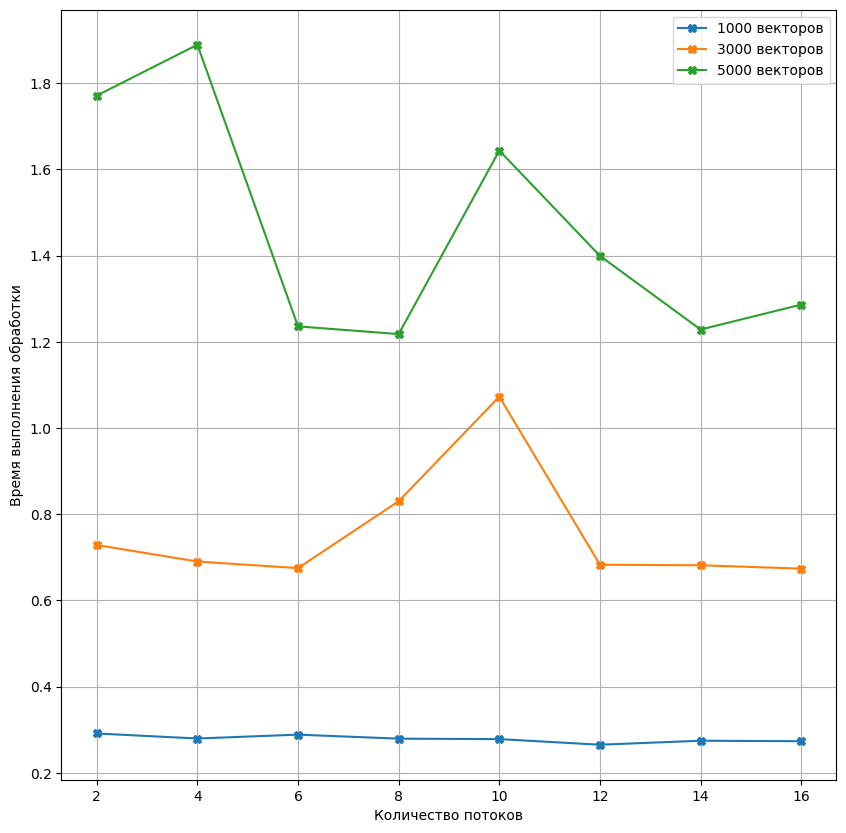

In [90]:
fig = plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plt.xlabel('Количество потоков')
plt.ylabel('Время выполнения обработки')
plt.grid(True)
plt.plot(number_of_threads,threads_execution_time_df_1000, label = '1000 векторов', marker = 'X')
plt.plot(number_of_threads,threads_execution_time_df_3000, label = '3000 векторов', marker = 'X')
plt.plot(number_of_threads,threads_execution_time_df_5000, label = '5000 векторов', marker = 'X')
plt.legend()

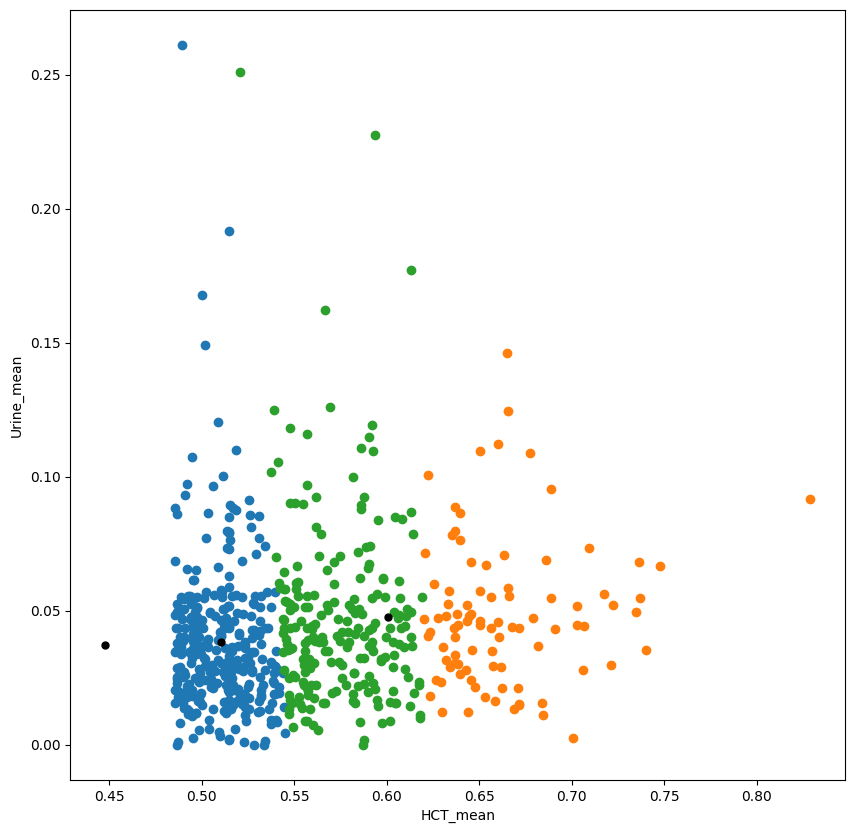

In [87]:
kmeans_3 = KMeans(n_clusters=3).fit(df_1000)
graphic(kmeans_3,df_1000)

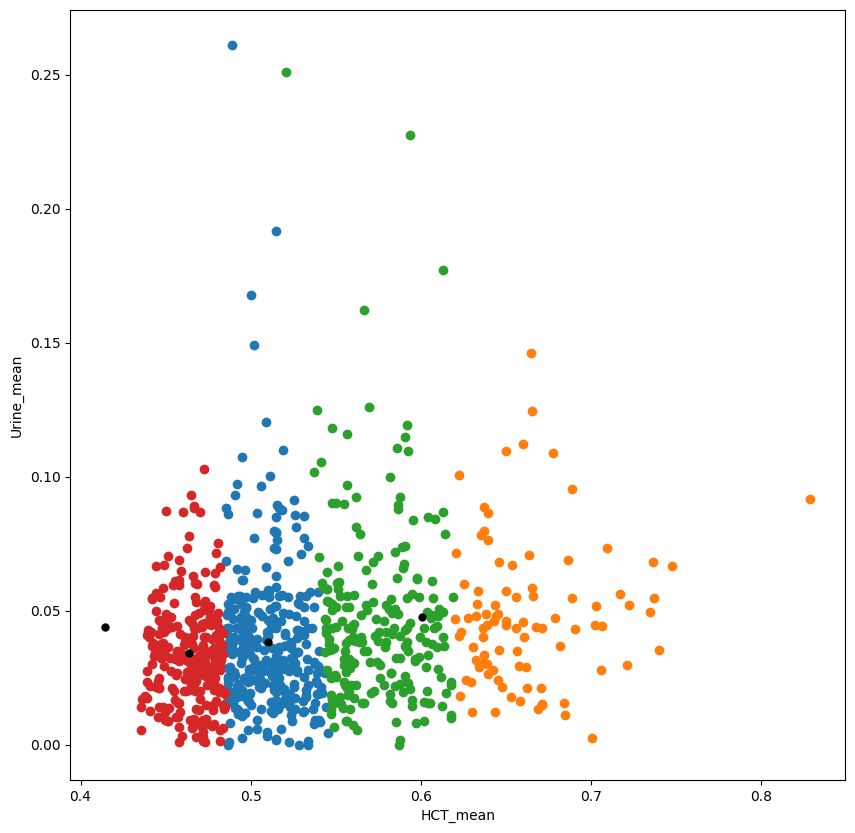

In [88]:
kmeans_4 = KMeans(n_clusters=4).fit(df_1000)
graphic(kmeans_4,df_1000)

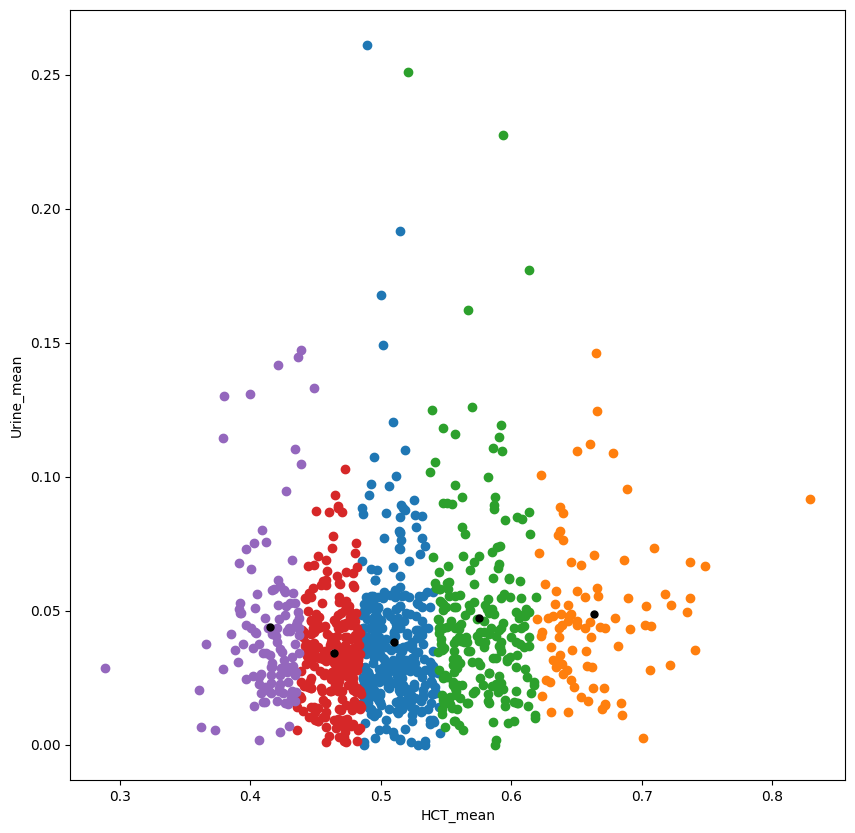

In [89]:
kmeans_5 = KMeans(n_clusters=5).fit(df_1000)
graphic(kmeans_5,df_1000)